In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

2022-09-29 14:43:59.408455: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-29 14:43:59.795712: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-09-29 14:43:59.795739: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-09-29 14:43:59.857021: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-29 14:44:00.856946: W tensorflow/stream_executor/platform/de

In [2]:
def print_detail(path):
    with open(path, 'r') as files:
        for file in files:
            print(file.strip())

In [3]:
path_detail = './dataset/detail_dataset.txt'
print_detail(path_detail)

# Dataset Description

In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

# File and Data Field Descriptions

* train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - Th

In [4]:
df_train = pd.read_csv('./dataset/train.csv')
df_test = pd.read_csv('./dataset/test.csv')

display(df_train.sample(5))
display(df_test.sample(5))

ValueError: Cannot take a larger sample than population when 'replace=False'

In [5]:
df_train.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 3.7 MB


In [6]:
df_train.shape

(8693, 14)

In [7]:
def table_diagnose(df):
    new_df = df.copy(deep=True)
    _1 = pd.concat([new_df.isnull().sum(), new_df.nunique(), new_df.dtypes], axis=1, keys=['n null', 'n unique', 'types']).reset_index()

    _2 = new_df.nunique().reset_index()
    _3 = _2.loc[_2[0] < 10, 'index'].apply(lambda x: new_df[x].unique())
    _4 = df.isna().sum() / df.isna().count()

    _4 = ((df.isna().sum() / df.isna().count()) * 100).reset_index()
    result = pd.merge(_1, _3, left_index=True, right_index=True, how='outer')
    result = pd.concat([result, _4], axis=1).drop(columns='index')
    result.rename(columns={'index_x': 'columns', 'index_y':'unique vals', 0: 'percentages (100%)'}, inplace=True)
    return result

In [8]:
table_diagnose(df_train)

,columns,n null,n unique,types,unique vals,percentages (100%)
0,PassengerId,0,8693,object,NaN,0.000000
1,HomePlanet,201,3,object,"[Europa, Earth, Mars, nan]",2.312205
2,CryoSleep,217,2,object,"[False, True, nan]",2.496261
3,Cabin,199,6560,object,NaN,2.289198
4,Destination,182,3,object,"[TRAPPIST-1e, PSO J318.5-22, 55 Cancri e, nan]",2.093639
5,Age,179,80,float64,NaN,2.059128
6,VIP,203,2,object,"[False, True, nan]",2.335212
7,RoomService,181,1273,float64,NaN,2.082135
8,FoodCourt,183,1507,float64,NaN,2.105142
9,ShoppingMall,208,1115,float64,NaN,2.392730


In [9]:
# test dataset
table_diagnose(df_test)

,columns,n null,n unique,types,unique vals,percentages (100%)
0,PassengerId,0,4277,object,NaN,0.000000
1,HomePlanet,87,3,object,"[Earth, Europa, Mars, nan]",2.034136
2,CryoSleep,93,2,object,"[True, False, nan]",2.174421
3,Cabin,100,3265,object,NaN,2.338087
4,Destination,92,3,object,"[TRAPPIST-1e, 55 Cancri e, PSO J318.5-22, nan]",2.151040
5,Age,91,79,float64,NaN,2.127660
6,VIP,93,2,object,"[False, nan, True]",2.174421
7,RoomService,82,842,float64,NaN,1.917232
8,FoodCourt,106,902,float64,NaN,2.478373
9,ShoppingMall,98,715,float64,NaN,2.291326


In [10]:
numerik_df_train = df_train.select_dtypes([float, int])
kategori_df_train = df_train.select_dtypes([object, bool])

display(kategori_df_train.sample(10))
display(numerik_df_train.sample(10))

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,VIP,Name,Transported
1561,1656_01,Earth,False,F/311/S,TRAPPIST-1e,False,Keithy Mallerez,False
7492,8015_02,Europa,False,B/315/S,TRAPPIST-1e,False,Duhrkab Fansty,False
3028,3280_01,Earth,True,G/534/P,PSO J318.5-22,False,Idace Ricks,True
8495,9074_02,Earth,False,G/1460/S,PSO J318.5-22,False,Janee Trerady,False
3288,3533_01,Mars,False,E/211/P,TRAPPIST-1e,False,Coakey Buthe,False
750,0789_01,Europa,False,A/8/S,TRAPPIST-1e,True,Mesath Imprank,False
7855,8383_01,Earth,True,G/1368/P,TRAPPIST-1e,False,Mariel Gibbsonton,False
5973,6328_01,Earth,True,G/1020/P,TRAPPIST-1e,False,Violey Hoppers,False
3867,4147_01,Europa,False,C/149/S,TRAPPIST-1e,False,Caphact Lendly,True
8285,8848_01,NaN,False,F/1824/P,TRAPPIST-1e,False,Leos Lacke,True


,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
8062,18.0,0.0,694.0,0.0,0.0,1370.0
4119,35.0,0.0,0.0,0.0,0.0,0.0
6783,65.0,43.0,21.0,22.0,50.0,731.0
8015,29.0,0.0,0.0,0.0,0.0,0.0
7744,10.0,0.0,0.0,0.0,0.0,0.0
4816,24.0,0.0,0.0,0.0,704.0,0.0
8657,49.0,6.0,1.0,638.0,1107.0,23.0
4961,27.0,3905.0,7.0,0.0,4.0,53.0
1202,19.0,6.0,NaN,1.0,714.0,0.0
5056,32.0,1781.0,0.0,654.0,580.0,0.0


### 1. EDA

In [11]:
df_train[5:]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
5,0005_01,Earth,False,F/0/P,PSO J318.5-22,44.0,False,0.0,483.0,0.0,291.0,0.0,Sandie Hinetthews,True
6,0006_01,Earth,False,F/2/S,TRAPPIST-1e,26.0,False,42.0,1539.0,3.0,0.0,0.0,Billex Jacostaffey,True
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
8,0007_01,Earth,False,F/3/S,TRAPPIST-1e,35.0,False,0.0,785.0,17.0,216.0,0.0,Andona Beston,True
9,0008_01,Europa,True,B/1/P,55 Cancri e,14.0,False,0.0,0.0,0.0,0.0,0.0,Erraiam Flatic,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


In [12]:
df_train['Age'].describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

#### Kategori umur menurut Departemen Kesehatan Republik Indonesia tahun 2009 yakni sebagai berikut :

* Masa balita usia 0 – 5 tahun
* Masa kanak-kanak usia 5 – 11 tahun
* Masa remaja awal usia 12 – 16 tahun
* Masa remaja akhir usia 17 – 25 tahun
* Masa dewasa awal usia 26 – 35 tahun
* Masa dewasa akhir usia 36 – 45 tahun
* Masa lansia awal usia 46 – 55 tahun
* Masa lansia akhir usia 56 – 65 tahun
* Masa manula usia 65 – ke atas


In [13]:
df_train_man = df_train.copy(deep=True)

df_train_man['Age (cat)'] = pd.cut(
    df_train_man['Age'], 
    bins=[0, 5, 12, 17, 26, 36, 46, 56, 65, 100], 
    labels=['balita', 'kanak-kanak', 'remaja awal', 'remaja akhir', 'dewasa awal', 'dewasa akhir', 'lansia awal', 'lansia akhir', 'manula']
)

df_train_man[:5]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age (cat)
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,dewasa akhir
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,remaja akhir
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,lansia akhir
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,dewasa awal
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,remaja awal


In [14]:
by_age_cat = df_train_man.groupby(by='Age (cat)')
by_age_cat.size()

Age (cat)
balita           321
kanak-kanak      307
remaja awal      739
remaja akhir    2619
dewasa awal     2015
dewasa akhir    1281
lansia awal      672
lansia akhir     298
manula            84
dtype: int64

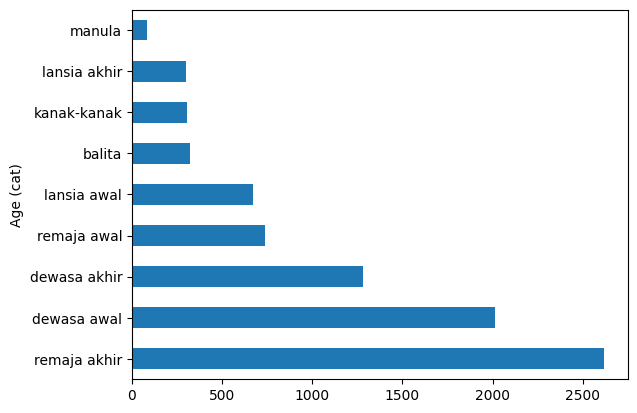

In [15]:
by_age_cat.size().sort_values(ascending=False).plot(kind='barh')
plt.show()

pada bar plot diatas menjukkan bahwa penumpang terbanyak adalah dari kalangan remaja akhir sedangkan yang sedikit adalah dari kalangan manula

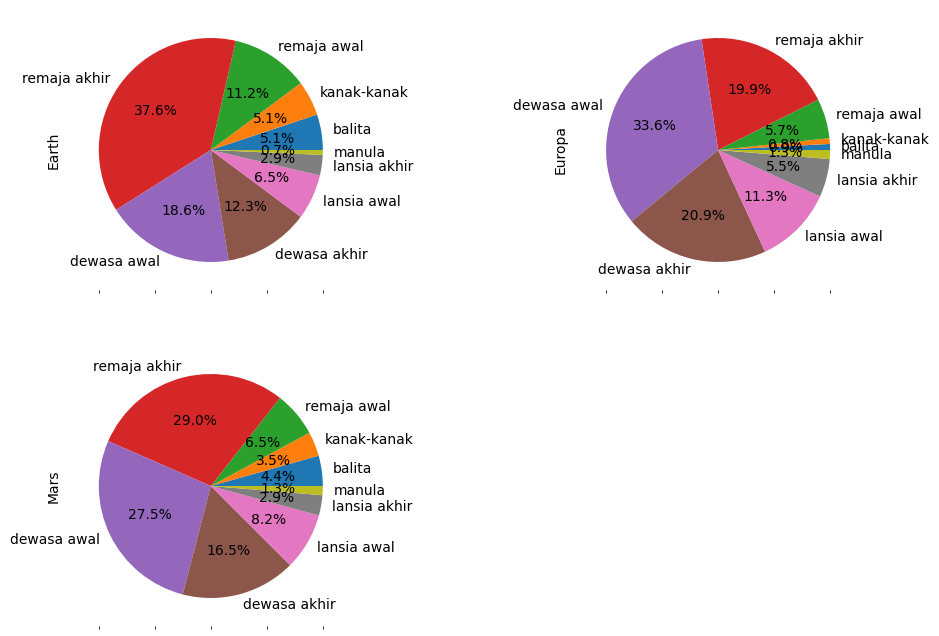

In [16]:
by_age_cat['HomePlanet'].value_counts().unstack('HomePlanet').plot(kind='pie', subplots=True, figsize=(12, 8), layout=(2, 2), autopct='%1.1f%%', legend=False)
plt.show()

pada pie plot diatas menjukkan bahwa 
- pada planet bumi yang menjadi dominan adalah usia remaja akhir (17-25)
- pada planet eropa yang menjadi dominan adalah usia dewasa awal (26-35)
- pada planet mats yang menjadi dominan adalah usia remaja akhir (17-25)

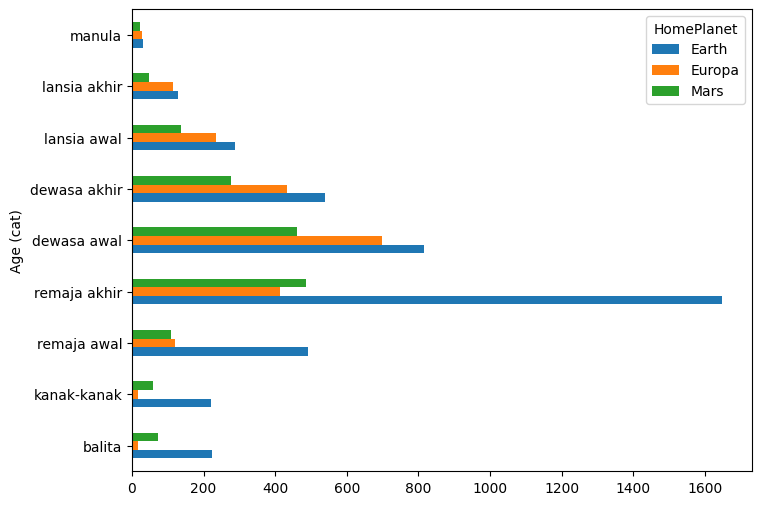

In [17]:
by_age_cat['HomePlanet'].value_counts().unstack('HomePlanet').plot(kind='barh', figsize=(8, 6))
plt.show()

dari ketiga homeplanet bahwa
- pada planet bumi yang menjadi dominan adalah usia remaja akhir (17-25)
- pada planet eropa yang menjadi dominan adalah usia dewasa awal (26-35)
- pada planet mats yang menjadi dominan adalah usia remaja akhir (17-25)

HomePlanet         Earth                                Europa                \
Destination  55 Cancri e PSO J318.5-22 TRAPPIST-1e 55 Cancri e PSO J318.5-22   
Age (cat)                                                                      
balita                49            31         144           1             0   
kanak-kanak           51            13         154           8             0   
remaja awal          108            85         294          45             0   
remaja akhir         213           288        1106         196             1   
dewasa awal          114           122         557         272            13   
dewasa akhir          60            79         384         199             2   
lansia awal           36            44         201          93             2   
lansia akhir          18            23          88          39             1   
manula                 3             5          23           9             0   

HomePlanet                      Mars                            
Destination  TRAPPIST-1e 55 Cancri e PSO J318.5-22 TRAPPIST-1e  
Age (cat)                                                       
balita                17          15             0          56  
kanak-kanak            8           0             0          59  
remaja awal           73          16             2          89  
remaja akhir         214          67             6         404  
dewasa awal          398          40            17         393  
dewasa akhir         227          21            16         230  
lansia awal          132          17             5         112  
lansia akhir          73           3             0          44  
manula                18           4             2          16

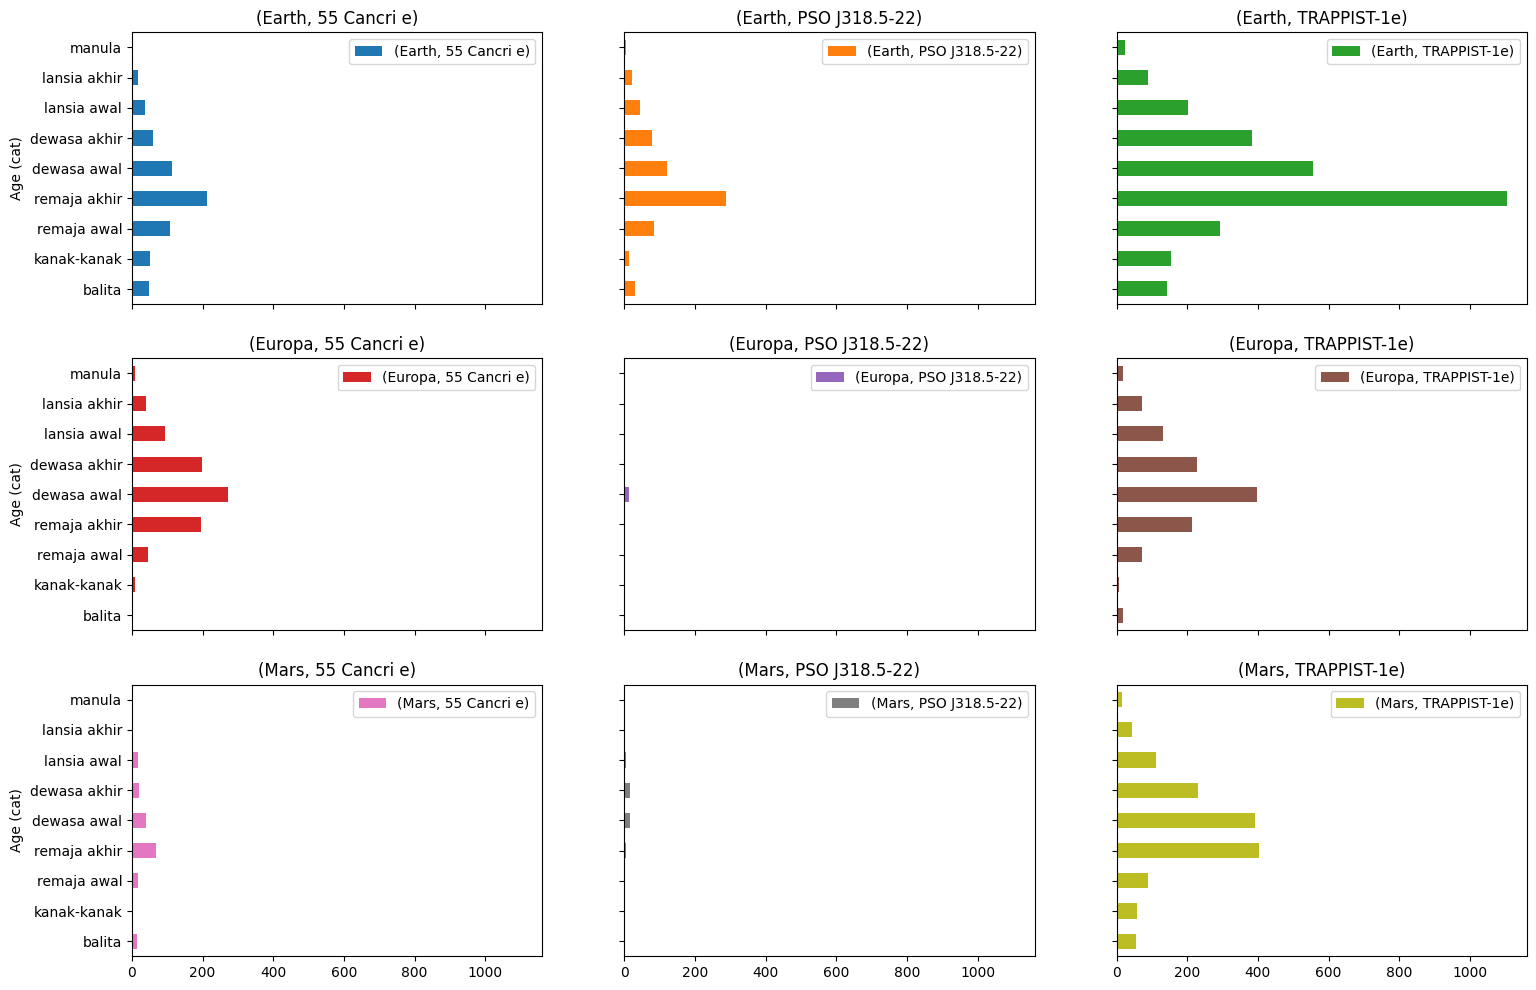

In [18]:
target_destination = by_age_cat[['HomePlanet', 'Destination']].value_counts().sort_index(level=1).unstack(['HomePlanet', 'Destination'])

display(target_destination)
target_destination.plot(kind='barh', subplots=True, layout=(3,3), figsize=(18,12), sharey=True)
plt.show()

dari grafik diatas menjukkan bahwa planet yang menjadi banyak pilihan oleh orang disetiap planet keberangkatannya adalah planet Trappist-1e kemungkinan karna planet tersebut relatif lebih dekat atau karna planet tersebut lebih layak dihuni...? ntahlah.. sedangkan planet yang jarang dituju adalah planet PSO j318.5-22

HomePlanet
Earth     4602
Europa    2131
Mars      1759
dtype: int64

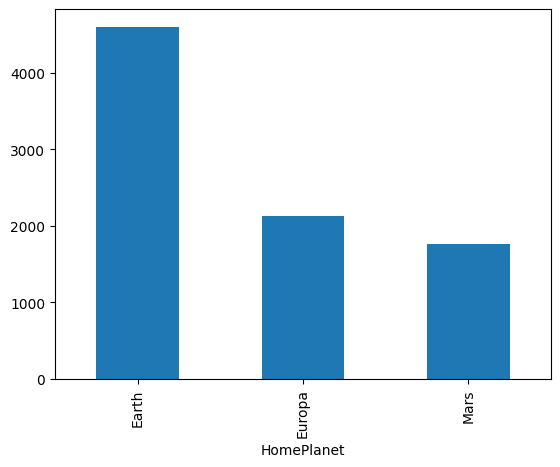

In [19]:
by_homeplanet = df_train_man.groupby(by='HomePlanet')

display(by_homeplanet.size())
by_homeplanet.size().plot(kind='bar')
plt.show()

dari ketiga planet yang dijadikan tempat keberangkatan, bahwa planet bumi memiliki jumlah penerbangan yang paling banyak.

In [20]:
print_detail(path_detail)

# Dataset Description

In this competition your task is to predict whether a passenger was transported to an alternate dimension during the Spaceship Titanic's collision with the spacetime anomaly. To help you make these predictions, you're given a set of personal records recovered from the ship's damaged computer system.

# File and Data Field Descriptions

* train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
* PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
* HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
* CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
* Cabin - Th

In [21]:
df_train_man[:5]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age (cat)
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,dewasa akhir
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,remaja akhir
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,lansia akhir
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,dewasa awal
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,remaja awal


In [22]:
table_diagnose(df_train_man)

,columns,n null,n unique,types,unique vals,percentages (100%)
0,PassengerId,0,8693,object,NaN,0.000000
1,HomePlanet,201,3,object,"[Europa, Earth, Mars, nan]",2.312205
2,CryoSleep,217,2,object,"[False, True, nan]",2.496261
3,Cabin,199,6560,object,NaN,2.289198
4,Destination,182,3,object,"[TRAPPIST-1e, PSO J318.5-22, 55 Cancri e, nan]",2.093639
5,Age,179,80,float64,NaN,2.059128
6,VIP,203,2,object,"[False, True, nan]",2.335212
7,RoomService,181,1273,float64,NaN,2.082135
8,FoodCourt,183,1507,float64,NaN,2.105142
9,ShoppingMall,208,1115,float64,NaN,2.392730


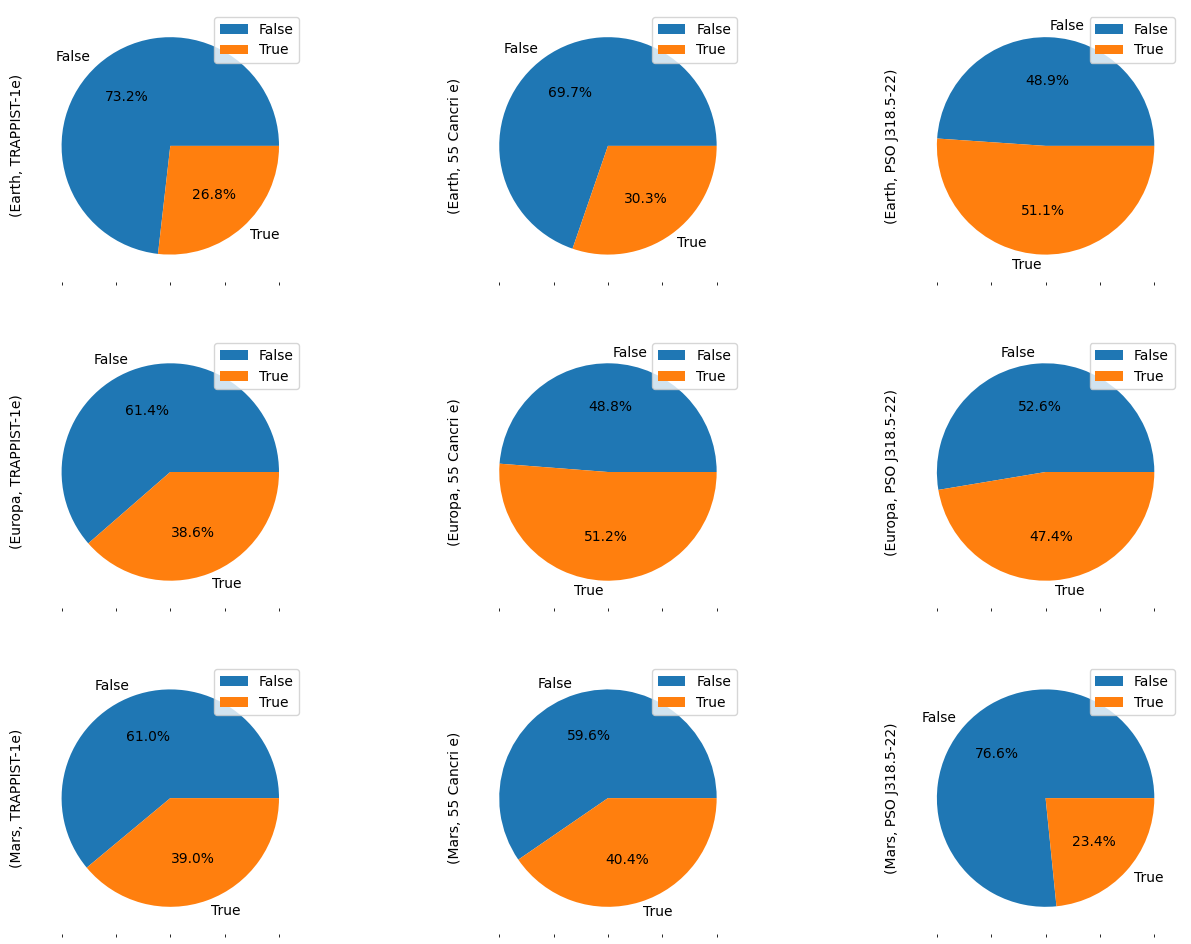

In [23]:
by_homeplanet[['Destination', 'CryoSleep']].value_counts().unstack(
    ['HomePlanet', 'Destination']
    ).plot(
        kind='pie', 
        subplots=True, 
        layout=(3,3), 
        figsize=(16,12),
        autopct='%1.1f%%'
    )
plt.show()

dari pie plot diatas saya dapat menyimpulkan bahwa untuk persentasi dari orang memilih untuk tidak cryosleep adalah karna planet yang dituju relatif lebih dekat atau tidak ingin mengambil risiko yang buruk, tapi hal itu dapat dipatahkan dengan pie plot pada keberangkatan dari bumi ke planet PSO j318.5-22, dimana orang memilih untuk cryosleep karna kemungkinan planet yang dituju memiliki jarak yang lebih jauh, dan kemungkinan juga itu menjadi alasan kenapa orang sedikit yang pergi ke planet PSO j318.5-22.

In [24]:
# df_train_man_copy = df_train_man.copy(deep=True)
df_train_man[['deck', 'num', 'side']] = df_train_man['Cabin'].str.split('/', expand=True)
df_train_man.drop(columns='Cabin', inplace=True)

In [25]:
df_train_man[:5]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age (cat),deck,num,side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,dewasa akhir,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,remaja akhir,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,lansia akhir,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,dewasa awal,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,remaja awal,F,1,S


In [26]:
table_diagnose(df_train_man)

,columns,n null,n unique,types,unique vals,percentages (100%)
0,PassengerId,0,8693,object,NaN,0.000000
1,HomePlanet,201,3,object,"[Europa, Earth, Mars, nan]",2.312205
2,CryoSleep,217,2,object,"[False, True, nan]",2.496261
3,Destination,182,3,object,"[TRAPPIST-1e, PSO J318.5-22, 55 Cancri e, nan]",2.093639
4,Age,179,80,float64,NaN,2.059128
5,VIP,203,2,object,"[False, True, nan]",2.335212
6,RoomService,181,1273,float64,NaN,2.082135
7,FoodCourt,183,1507,float64,NaN,2.105142
8,ShoppingMall,208,1115,float64,NaN,2.392730
9,Spa,183,1327,float64,NaN,2.105142


In [27]:
by_vipCryosleep = df_train_man.pivot_table(values='Age', columns=['VIP', 'CryoSleep'], index=['side'], aggfunc='count')

by_vipCryosleep

VIP       False        True     
CryoSleep False  True False True
side                            
P          2488  1339    90    9
S          2469  1440    78   12

dari tabel diatas bahwa vip dan cryosleep tidak berkaitan, dan penumpang cenderung memilih untuk tidak VIP karna mungkin mahal, lalu pada side bahwa untu P (port) atau S (starboard) memiliki jumlah yang tidak terlalu beda, dan juga pada tabel diatas bahwa penumpang cenderung tidak memilih untuk CryoSleep.

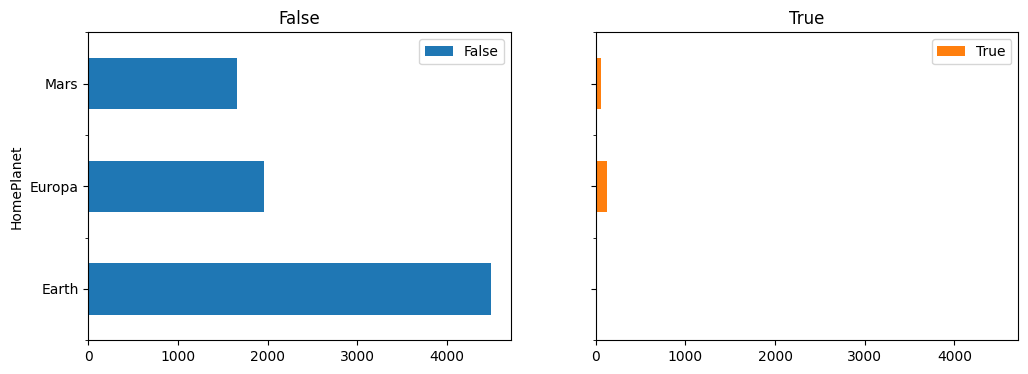

In [28]:
by_homeplanet['VIP'].value_counts().unstack('HomePlanet').T.plot(kind='barh', subplots=True, layout=(1,2), figsize=(12, 4), sharey=True)
plt.show()

dari grafik diatas planet bumi tidak satupun orang yang membayar untuk VIP, dan yang banyak meembayar VIP adalah europa, walaupun kebanyakan dari setiap planet tidak membyar untuk VIP

In [29]:
by_vip = df_train_man.groupby(by='VIP')[['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']].agg(['mean', 'count'])
by_vip

RoomService          FoodCourt       ShoppingMall               Spa  \
             mean count         mean count         mean count        mean   
VIP                                                                         
False  217.218527  8118   426.336536  8118   173.876298  8092  301.711045   
True   473.615385   195  1811.393782   193   247.726804   194  760.710660   

                  VRDeck        
      count         mean count  
VIP                             
False  8112   282.718056  8108  
True    197  1234.856410   195

dari tabel diatas dapat disimpulkan bahwa VIP itu berpengaruh kepada RoomService, FoodCourt, ShoppingMall, Spa, dan VRDeck

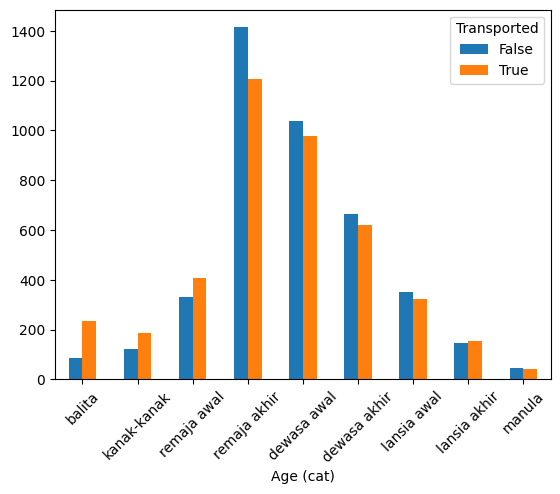

In [30]:
by_age_cat['Transported'].value_counts().unstack('Transported').plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

In [31]:
by_transported = df_train_man.groupby(by='Transported')
by_transported['side'].value_counts().unstack('Transported')

Transported,False,True
side,,
P,2308,1898
S,1908,2380


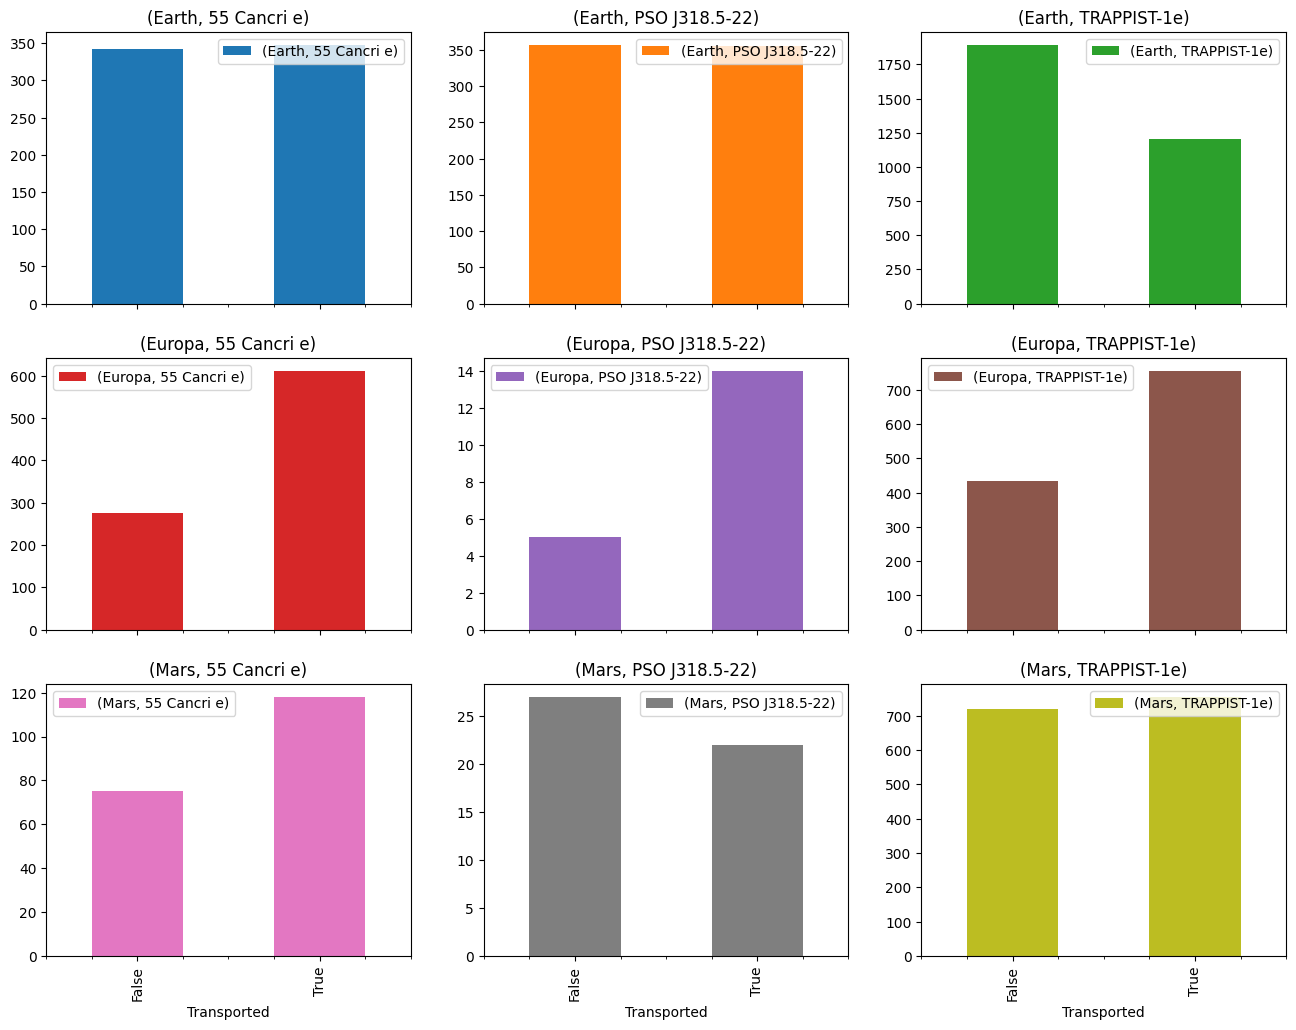

In [32]:
by_transported[['HomePlanet', 'Destination']].value_counts().sort_index(level='HomePlanet').unstack(['HomePlanet', 'Destination']).plot(kind='bar', subplots=True, layout=(3,3), figsize=(16,12))
plt.show()

In [33]:
by_transported['VIP'].value_counts().unstack('VIP')

VIP,False,True
Transported,,
False,4093,123
True,4198,76


In [34]:
by_transported['CryoSleep'].value_counts().unstack('CryoSleep')

CryoSleep,False,True
Transported,,
False,3650,554
True,1789,2483


In [35]:
df_train_man[:5]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Age (cat),deck,num,side
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,dewasa akhir,B,0,P
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,remaja akhir,F,0,S
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,lansia akhir,A,0,S
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,dewasa awal,A,0,S
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,remaja awal,F,1,S


In [36]:
df_train_man[['gggg', 'pp']] = df_train_man['PassengerId'].str.split('_', expand=True)
df_train_man[['f_name', 'l_name']] = df_train_man['Name'].str.split(' ', expand=True)

In [37]:
df_train_man[:5]

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Name,Transported,Age (cat),deck,num,side,gggg,pp,f_name,l_name
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,Maham Ofracculy,False,dewasa akhir,B,0,P,0001,01,Maham,Ofracculy
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,Juanna Vines,True,remaja akhir,F,0,S,0002,01,Juanna,Vines
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,Altark Susent,False,lansia akhir,A,0,S,0003,01,Altark,Susent
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,Solam Susent,False,dewasa awal,A,0,S,0003,02,Solam,Susent
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,Willy Santantines,True,remaja awal,F,1,S,0004,01,Willy,Santantines


In [38]:
df_train_man.groupby(by='f_name')['l_name'].value_counts()

f_name   l_name    
Aard     Curle         1
Aarjel   Jaff          1
         Rhuba         1
Aark     Ches          1
         Homin         1
                      ..
Zosmark  Unaasor       1
Zosmas   Ineedeve      1
         Mormonized    1
Zubeneb  Flesping      1
         Pasharne      1
Name: l_name, Length: 8473, dtype: int64

In [39]:
by_transported[['side']].value_counts().unstack(['side'])

side,P,S
Transported,,
False,2308,1908
True,1898,2380


In [40]:
by_transported[['deck']].value_counts().unstack(['deck'])

deck,A,B,C,D,E,F,G,T
Transported,,,,,,,,
False,129,207,239,271,563,1565,1238,4
True,127,572,508,207,313,1229,1321,1


In [41]:
by_transported['pp'].value_counts().unstack('pp')

pp,01,02,03,04,05,06,07,08
Transported,,,,,,,,
False,3258,623,218,94,58,34,23,7
True,2959,789,353,137,70,41,23,6


### 2. Data preparasi

target_columns = [HomePlanet, CryoSleep, Destination, Age, RoomService, FoodCourt, ShoppingMall, Spa, VRDeck, PassengerId (pp), Cabin (deck, side)]

In [426]:
df_train_next = df_train.copy(deep=True)
df_test_next = df_test.copy(deep=True)

df_target_train = df_train_next['Transported']
df_train_next.drop(columns='Transported', inplace=True)

df_train_next['isTrain'] = True
df_test_next['isTrain'] = False

df_full = pd.concat([df_train_next, df_test_next], axis=0)


In [427]:
df_full[:5]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,isTrain
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,True
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,True
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,True
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [428]:
df_full[['gggg', 'pp']] = df_full['PassengerId'].str.split('_', expand=True)
df_full[['deck', 'num', 'side']] = df_full['Cabin'].str.split('/', expand=True)

In [429]:
df_full.drop(columns=['PassengerId', 'Cabin', 'Name', 'VIP'], inplace=True)

In [430]:
df_full[:5]

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,isTrain,gggg,pp,deck,num,side
0,Europa,False,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,True,0001,01,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,True,0002,01,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,True,0003,01,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,True,0003,02,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,True,0004,01,F,1,S


In [431]:
table_diagnose(df_full)

,columns,n null,n unique,types,unique vals,percentages (100%)
0,HomePlanet,288,3,object,"[Europa, Earth, Mars, nan]",2.220509
1,CryoSleep,310,2,object,"[False, True, nan]",2.390131
2,Destination,274,3,object,"[TRAPPIST-1e, PSO J318.5-22, 55 Cancri e, nan]",2.112567
3,Age,270,80,float64,NaN,2.081727
4,RoomService,263,1578,float64,NaN,2.027756
5,FoodCourt,289,1953,float64,NaN,2.228219
6,ShoppingMall,306,1367,float64,NaN,2.359291
7,Spa,284,1679,float64,NaN,2.189668
8,VRDeck,268,1642,float64,NaN,2.066307
9,isTrain,0,2,bool,"[True, False]",0.000000


In [432]:
df_full.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [433]:
numerikal_df = df_full.select_dtypes(exclude=['category', 'object'])
kategori_df = df_full.select_dtypes(include=['object'])

In [434]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

df_full[numerikal_df.columns] = df_full[numerikal_df.columns].fillna(df_full[numerikal_df.columns].median())
df_full[kategori_df.columns] = imp_mean.fit_transform(df_full[kategori_df.columns])

In [435]:
table_diagnose(df_full)

,columns,n null,n unique,types,unique vals,percentages (100%)
0,HomePlanet,0,3,object,"[Europa, Earth, Mars]",0.0
1,CryoSleep,0,2,object,"[False, True]",0.0
2,Destination,0,3,object,"[TRAPPIST-1e, PSO J318.5-22, 55 Cancri e]",0.0
3,Age,0,80,float64,NaN,0.0
4,RoomService,0,1578,float64,NaN,0.0
5,FoodCourt,0,1953,float64,NaN,0.0
6,ShoppingMall,0,1367,float64,NaN,0.0
7,Spa,0,1679,float64,NaN,0.0
8,VRDeck,0,1642,float64,NaN,0.0
9,isTrain,0,2,bool,"[True, False]",0.0


In [436]:
df_full.drop(columns=['gggg', 'num'], inplace=True)

In [437]:
df_full[:5]

,HomePlanet,CryoSleep,Destination,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,isTrain,pp,deck,side
0,Europa,False,TRAPPIST-1e,39.0,0.0,0.0,0.0,0.0,0.0,True,01,B,P
1,Earth,False,TRAPPIST-1e,24.0,109.0,9.0,25.0,549.0,44.0,True,01,F,S
2,Europa,False,TRAPPIST-1e,58.0,43.0,3576.0,0.0,6715.0,49.0,True,01,A,S
3,Europa,False,TRAPPIST-1e,33.0,0.0,1283.0,371.0,3329.0,193.0,True,02,A,S
4,Earth,False,TRAPPIST-1e,16.0,303.0,70.0,151.0,565.0,2.0,True,01,F,S


In [438]:
df_full = pd.get_dummies(data=df_full, columns=['Destination', 'HomePlanet', 'deck', 'side'])

In [439]:
table_diagnose(df_full)

,columns,n null,n unique,types,unique vals,percentages (100%)
0,CryoSleep,0,2,object,"[False, True]",0.0
1,Age,0,80,float64,NaN,0.0
2,RoomService,0,1578,float64,NaN,0.0
3,FoodCourt,0,1953,float64,NaN,0.0
4,ShoppingMall,0,1367,float64,NaN,0.0
5,Spa,0,1679,float64,NaN,0.0
6,VRDeck,0,1642,float64,NaN,0.0
7,isTrain,0,2,bool,"[True, False]",0.0
8,pp,0,8,object,"[01, 02, 03, 04, 05, 06, 07, 08]",0.0
9,Destination_55 Cancri e,0,2,uint8,"[0, 1]",0.0


In [440]:
df_full[['CryoSleep']] = df_full[['CryoSleep']].replace({False:0, True:1})
df_full['pp'] = df_full['pp'].astype(int)

In [441]:
table_diagnose(df_full)

,columns,n null,n unique,types,unique vals,percentages (100%)
0,CryoSleep,0,2,int64,"[0, 1]",0.0
1,Age,0,80,float64,NaN,0.0
2,RoomService,0,1578,float64,NaN,0.0
3,FoodCourt,0,1953,float64,NaN,0.0
4,ShoppingMall,0,1367,float64,NaN,0.0
5,Spa,0,1679,float64,NaN,0.0
6,VRDeck,0,1642,float64,NaN,0.0
7,isTrain,0,2,bool,"[True, False]",0.0
8,pp,0,8,int64,"[1, 2, 3, 4, 5, 6, 7, 8]",0.0
9,Destination_55 Cancri e,0,2,uint8,"[0, 1]",0.0


In [442]:
df_get_train = df_full[df_full['isTrain'] == True]
df_get_test = df_full[df_full['isTrain'] == False]

In [443]:
print(df_get_train.shape)
print(df_get_test.shape)

(8693, 25)
(4277, 25)


In [444]:
scaler = MinMaxScaler()

df_get_train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'pp']] = scaler.fit_transform(df_get_train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'pp']])

/tmp/ipykernel_5111/4192098334.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_get_train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'pp']] = scaler.fit_transform(df_get_train[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'pp']])


In [445]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

X = df_get_train.drop(columns='isTrain')
y = pd.Series(lb.fit_transform(df_target_train).ravel())

display(X[:5])
display(y[:5])

,CryoSleep,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,pp,Destination_55 Cancri e,Destination_PSO J318.5-22,...,deck_A,deck_B,deck_C,deck_D,deck_E,deck_F,deck_G,deck_T,side_P,side_S
0,0,0.493671,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0.303797,0.007608,0.000302,0.001064,0.024500,0.001823,0.000000,0,0,...,0,0,0,0,0,1,0,0,0,1
2,0,0.734177,0.003001,0.119948,0.000000,0.299670,0.002030,0.000000,0,0,...,1,0,0,0,0,0,0,0,0,1
3,0,0.417722,0.000000,0.043035,0.015793,0.148563,0.007997,0.142857,0,0,...,1,0,0,0,0,0,0,0,0,1
4,0,0.202532,0.021149,0.002348,0.006428,0.025214,0.000083,0.000000,0,0,...,0,0,0,0,0,1,0,0,0,1


0    0
1    1
2    0
3    0
4    1
dtype: int64

In [446]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    stratify=y,
    test_size=.2,
    random_state=42
)

In [448]:
print(f'X: {X.shape}')
print(f'y: {y.shape}')
print(f'X_train: {X_train.shape}')
print(f'y_train: {y_train.shape}')
print(f'X_valid: {X_valid.shape}')
print(f'y_valid: {y_valid.shape}')

X: (8693, 24)
y: (8693,)
X_train: (6954, 24)
y_train: (6954,)
X_valid: (1739, 24)
y_valid: (1739,)


In [449]:
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(126, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=keras.losses.binary_crossentropy,
    optimizer=keras.optimizers.Adam(),
    metrics=['accuracy']
)

lr_schedular = keras.callbacks.LearningRateScheduler(lambda epoch: 10e-4 * 10**(epoch/20))

history = model.fit(
    X_train,
    y_train,
    epochs=50,
    batch_size=32,
    callbacks=[lr_schedular],
    validation_data=(X_valid, y_valid)
)



Epoch 1/50
218/218 [==============================] - 1s 4ms/step - loss: 0.5225 - accuracy: 0.7381 - val_loss: 0.4581 - val_accuracy: 0.7648 - lr: 0.0010
Epoch 2/50
218/218 [==============================] - 1s 3ms/step - loss: 0.4683 - accuracy: 0.7699 - val_loss: 0.4383 - val_accuracy: 0.7849 - lr: 0.0011
Epoch 3/50
218/218 [==============================] - 1s 3ms/step - loss: 0.4451 - accuracy: 0.7801 - val_loss: 0.4140 - val_accuracy: 0.7809 - lr: 0.0013
Epoch 4/50
218/218 [==============================] - 1s 3ms/step - loss: 0.4343 - accuracy: 0.7879 - val_loss: 0.4306 - val_accuracy: 0.7849 - lr: 0.0014
Epoch 5/50
218/218 [==============================] - 1s 3ms/step - loss: 0.4293 - accuracy: 0.7919 - val_loss: 0.4203 - val_accuracy: 0.7832 - lr: 0.0016
Epoch 6/50
218/218 [==============================] - 1s 3ms/step - loss: 0.4234 - accuracy: 0.7918 - val_loss: 0.4030 - val_accuracy: 0.7861 - lr: 0.0018
Epoch 7/50
218/218 [==============================] - 1s 3ms/step - lo

<AxesSubplot:>

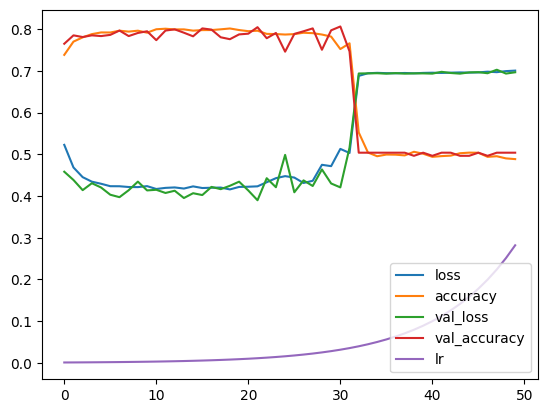

In [450]:
pd.DataFrame(history.history).plot()

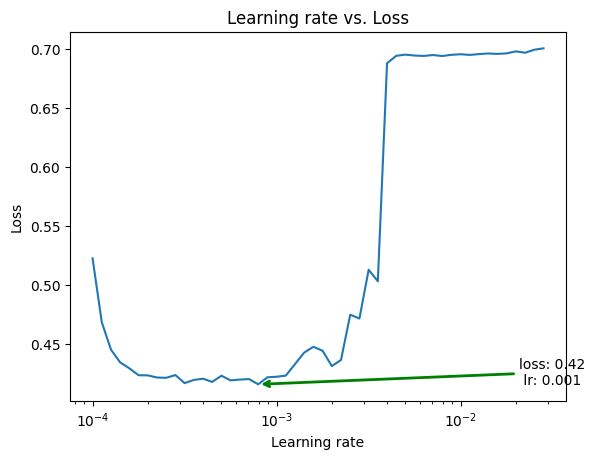

In [451]:
lrs =  1e-4 * (10**(tf.range(50) / 20)) # samakan dengan epochs pada proses fitting
loss = np.array(history.history['loss'])

history_lr = pd.DataFrame(np.c_[lrs, np.array(history.history['loss'])])
x_lr, y_loss = history_lr.iloc[np.argmin(loss)] 

plt.semilogx(lrs, loss)
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title('Learning rate vs. Loss')

plt.annotate(
    f"loss: {round(y_loss, 2)}\n lr: {round(x_lr, 3)}", 
    xy=(x_lr, y_loss), 
    xytext=(x_lr+0.02, y_loss), 
    arrowprops=dict(arrowstyle="->", 
    color="green", 
    lw=2,
   )
)

plt.show()

In [513]:
model = keras.Sequential([
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dense(126, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss=keras.losses.binary_crossentropy,
    optimizer=keras.optimizers.Adam(learning_rate=.0001),
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    epochs=30,
    batch_size=32,
    validation_data=(X_valid, y_valid)
)



Epoch 1/30
218/218 [==============================] - 1s 4ms/step - loss: 0.5882 - accuracy: 0.6979 - val_loss: 0.5287 - val_accuracy: 0.7343
Epoch 2/30
218/218 [==============================] - 1s 3ms/step - loss: 0.5150 - accuracy: 0.7436 - val_loss: 0.4944 - val_accuracy: 0.7470
Epoch 3/30
218/218 [==============================] - 1s 3ms/step - loss: 0.4885 - accuracy: 0.7606 - val_loss: 0.4678 - val_accuracy: 0.7550
Epoch 4/30
218/218 [==============================] - 1s 3ms/step - loss: 0.4686 - accuracy: 0.7722 - val_loss: 0.4617 - val_accuracy: 0.7573
Epoch 5/30
218/218 [==============================] - 1s 3ms/step - loss: 0.4544 - accuracy: 0.7791 - val_loss: 0.4377 - val_accuracy: 0.7746
Epoch 6/30
218/218 [==============================] - 1s 3ms/step - loss: 0.4416 - accuracy: 0.7842 - val_loss: 0.4223 - val_accuracy: 0.7798
Epoch 7/30
218/218 [==============================] - 1s 3ms/step - loss: 0.4303 - accuracy: 0.7925 - val_loss: 0.4167 - val_accuracy: 0.7775
Epoch 

In [514]:
X_test = df_get_test.drop(columns='isTrain')

X_test[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'pp']] = scaler.transform(X_test[['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'pp']])

In [515]:
y_pred = pd.Series(lb.inverse_transform(np.round(model.predict(X_test)).ravel()))
y_pred.value_counts()

134/134 [==============================] - 0s 1ms/step


True     2260
False    2017
dtype: int64

In [516]:
y_test = pd.read_csv('./dataset/sample_submission.csv')
y_submission = y_test.copy(deep=True)

y_submission['Transported'] = y_pred

In [517]:
y_submission.to_csv('./dataset/my_submission.csv')